In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv("C:/Users/Vartotojas/Desktop/Financial analysis training/AAPL.csv", index_col=0, parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-11,142.270004,144.809998,141.809998,142.809998,142.014206,64452200
2021-10-12,143.229996,143.250000,141.039993,141.509995,140.721451,73035900
2021-10-13,141.240005,141.399994,139.199997,140.910004,140.124786,78762700
2021-10-14,142.110001,143.880005,141.509995,143.759995,142.958923,69907100
2021-10-15,143.770004,144.899994,143.509995,144.839996,144.032898,67940300


In [4]:
#MACD is a lagging indicator when trading on thr crossovers
#Calculate MACD (exponential moving average 12 period - exponential moving average 26 period)
exp1 = data["Close"].ewm(span=12, adjust=False).mean()
exp2 = data["Close"].ewm(span=26, adjust=False).mean()

data["MACD"] = exp1 - exp2

#Signal line 9-period EMA of MACD
data["Signal line"] = data["MACD"].ewm(span=9, adjust=False).mean()

data.tail()



,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
Date,,,,,,,,
2022-10-04,145.029999,146.220001,144.259995,146.100006,146.100006,87830100,-4.253940,-3.365806
2022-10-05,144.070007,147.380005,143.009995,146.399994,146.399994,79471000,-4.065679,-3.505781
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200,-3.949228,-3.594470
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100,-4.238968,-3.723370
2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74827900,-4.391340,-3.856964


<AxesSubplot:>

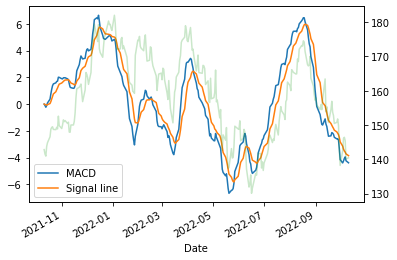

In [7]:
%matplotlib inline
fig, ax = plt.subplots()
data[["MACD", "Signal line"]].plot(ax=ax)

data["Close"].plot(ax=ax, alpha = 0.25, secondary_y= True )

In [8]:
# Stochastic oscillator
# maximum of last 14trading days
high14 = data["High"].rolling(14).max()

# mainimum of last 14 trading days
low14 = data["Low"].rolling(14).min()

# %K (Last close - 14low)*100/(14high-14low)

data["%K"] = (data["Close"]- low14)*100/(high14-low14)
# %D SImple moving average

data["%D"] = data["%K"].rolling(3).mean()


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
2022-10-04,145.029999,146.220001,144.259995,146.100006,146.100006,87830100,-4.253940,-3.365806,39.952507,21.150868
2022-10-05,144.070007,147.380005,143.009995,146.399994,146.399994,79471000,-4.065679,-3.505781,41.377628,34.647645
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200,-3.949228,-3.594470,36.769548,39.366561
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100,-4.238968,-3.723370,11.401395,29.849524
2022-10-10,140.419998,141.889999,138.570007,140.419998,140.419998,74827900,-4.391340,-3.856964,12.969100,20.380015


<AxesSubplot:xlabel='Date'>

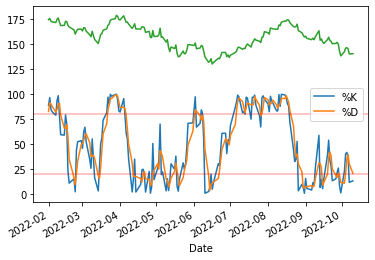

In [23]:
# we are looking where D line is lower than K line it is time to buy, when the K line is lower it is time to sell
fig, ax = plt.subplots()
data[["%K","%D"]].loc["2022-02-01":].plot(ax=ax)

ax.axhline(80, c="r", alpha = 0.3)
ax.axhline(20, c="r", alpha = 0.3)

data["Close"].loc["2022-02-01":].plot(ax=ax)